# Benchmark Analysis for radius up to R = 128

In [21]:
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.api as sm
from math import log10, floor

plt.style.use("seaborn")

In [22]:
def round_sig(x, sig=2):
    return round(x, sig-int(floor(log10(abs(x))))-1)

In [23]:
data = np.loadtxt("./data/bench_r256_seeds100.csv", delimiter = ",")

r = data[:, 0]
t = data[:, 1]
n = data[:, 2]

## Plot raw data

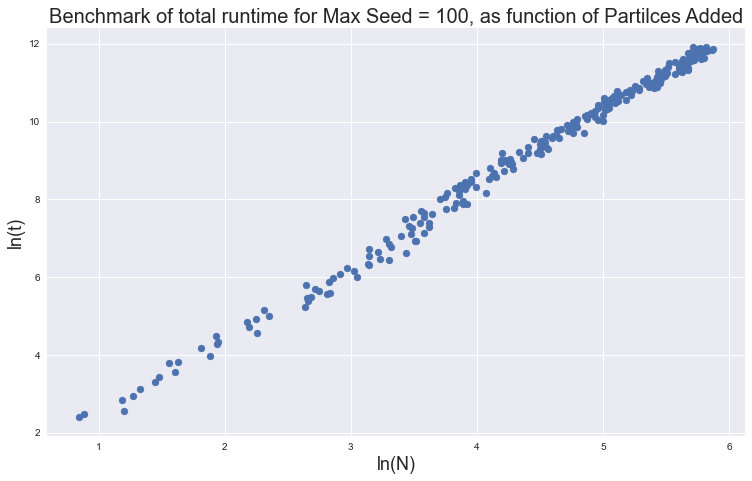

In [24]:
# Create figure
fig = plt.figure()
fig.set_size_inches(12.5, 7.5)
ax = plt.subplot(111)

plt.title("Benchmark of total runtime for Max Seed = 100, as function of Particles Added", fontsize = 20)
plt.xlabel("ln(N)", fontsize = 18)
plt.ylabel("ln(t)", fontsize = 18)

n_plot = np.log(n)
t_plot = np.log(t)

plt.scatter(n_plot, t_plot)

plt.show()

## Get scaling constant

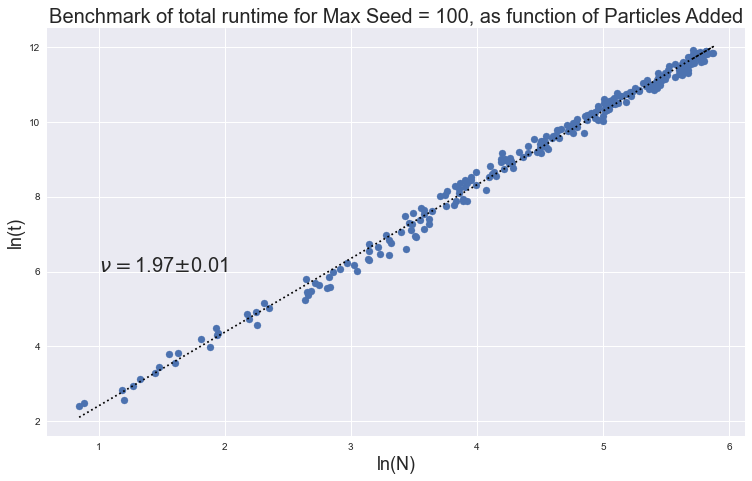

In [25]:
n_plot_model = sm.add_constant(n_plot)

model = sm.OLS(t_plot, n_plot_model)

results = model.fit()

params = results.params
bse = results.bse

t_plot_fit = params[1] * n_plot + params[0]

# Create figure
fig = plt.figure()
fig.set_size_inches(12.5, 7.5)
ax = plt.subplot(111)

plt.title("Benchmark of total runtime for Max Seed = 100, as function of Particles Added", fontsize = 20)
plt.xlabel("ln(N)", fontsize = 18)
plt.ylabel("ln(t)", fontsize = 18)

plt.scatter(n_plot, t_plot)
plt.plot(n_plot, t_plot_fit, linestyle = ':', color = 'k')


nu = params[1]

nu_err = round_sig(results.bse[1], 1)

# Find number of decimal places that the error is to 1sf
nu_dec = str(nu_err)[::-1].find('.')

# Round nu to this number of decimal places
nu = np.round(nu, nu_dec)

text_out = r"$\nu =$" + str(nu) + r"$\pm$" + str(nu_err)

ax.text(1.0, 6, text_out, fontsize = 20)

plt.show()